SYRIATEL CHURN PREDICTION

BUSINESS UNDERSTANDING


1.1 BUSINESS OVERVIEW

SyriaTel, a telecommunications company, is facing customer churn—where subscribers stop using their services and switch to competitors. The main business objective is to reduce churn and thereby protect revenues, since acquiring a new customer is usually more expensive than retaining an existing one.

1.2 BUSINESS PROBLEM

SyriaTel is losing customers to competitors, which reduces revenue. The company currently notices churn only after customers leave, making it costly to replace them. The business problem is to find a way to identify customers who are most likely to leave in advance, so the company can take action to retain them and reduce losses.


#### 1.3 Business Objectives

Main Objective

To build a machine learning model that accurately predicts whether a customer is likely to churn.

Specific Objectives

1. To determine how customer demographics influence churn.  
2. To examine the effect of service usage on churn.  
3. To analyze the impact of financial factors on churn.  
4. To identify behavioral indicators that signal potential churn.  
5. To segment customers and assess which groups are most at risk of churning.  

Research Questions  
1. How do customer demographics influence churn?  
2. Does service usage affect the likelihood of churn?  
3. How do financial factors such as billing and payment methods relate to churn?  
4. What behavioral indicators can signal potential churn?  
5. Which customer segments are most at risk of churning?  



DATA PREPARATION

In [143]:
#import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [144]:
#load the dataset
SyriaTel = pd.read_csv(r"C:\Users\user\Desktop\PHASE 3 WORK\archive\bigml_59c28831336c6604c800002a.csv")
SyriaTel.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [145]:
#Get the info of the dataset
SyriaTel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [146]:
SyriaTel.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [147]:
#Get the number of rows and columns
SyriaTel.shape

(3333, 21)

In [148]:
# Drop unnecessary columnsd
SyriaTel = SyriaTel.drop(['international plan', 'voice mail plan'], axis=1, errors='ignore')
# Check new shape
print("Dataset Shape after dropping:", SyriaTel.shape)


Dataset Shape after dropping: (3333, 19)


In [149]:
#check for missing values
SyriaTel.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [150]:
#Drop the duplicates
SyriaTel.drop_duplicates

<bound method DataFrame.drop_duplicates of      state  account length  area code phone number  number vmail messages  \
0       KS             128        415     382-4657                     25   
1       OH             107        415     371-7191                     26   
2       NJ             137        415     358-1921                      0   
3       OH              84        408     375-9999                      0   
4       OK              75        415     330-6626                      0   
...    ...             ...        ...          ...                    ...   
3328    AZ             192        415     414-4276                     36   
3329    WV              68        415     370-3271                      0   
3330    RI              28        510     328-8230                      0   
3331    CT             184        510     364-6381                      0   
3332    TN              74        415     400-4344                     25   

      total day minutes  total d

In [151]:
# Convert churn to numeric
SyriaTel['churn'] = SyriaTel['churn'].astype(int)


In [152]:
#save the cleaned dataset
SyriaTel.to_csv('SyriaTel_cleaned.csv', index=False)

In [153]:
#check on the new cleaned dataset
SyriaTel_cleaned = pd.read_csv('SyriaTel_cleaned.csv')
SyriaTel_cleaned.head()

,state,account length,area code,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


EXPLANATORY DATA ANALYSIS

Visualisation on how demograpghic influences churn

Average account length for churners vs non-churners:
        count        mean       std  min   25%    50%    75%    max
churn                                                              
0      2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0
1       483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0


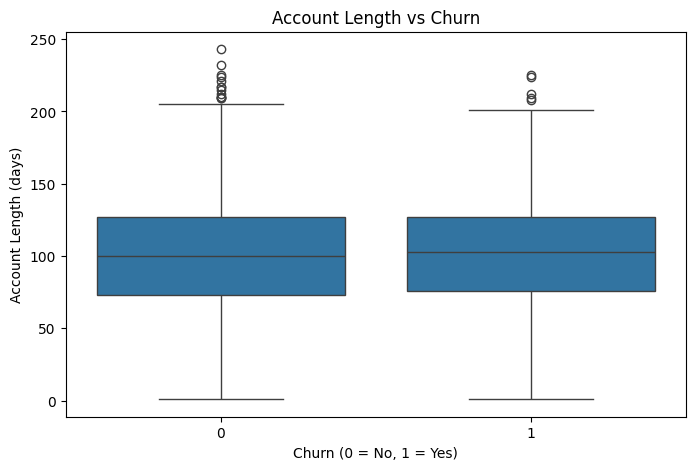

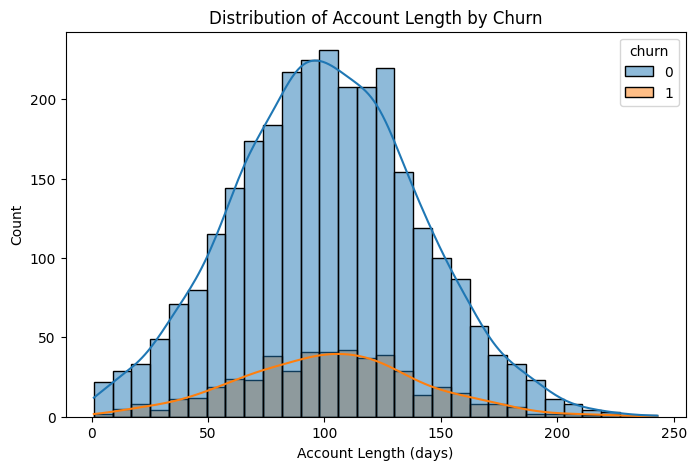

In [154]:
#Summary statistics of account length by churn
print("Average account length for churners vs non-churners:")
print(SyriaTel_cleaned.groupby('churn')['account length'].describe())
#Boxplot to visualize distribution
plt.figure(figsize=(8,5))
sns.boxplot(x='churn', y='account length', data=SyriaTel_cleaned)
plt.title("Account Length vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Account Length (days)")
plt.show()
#Histogram
plt.figure(figsize=(8,5))
sns.histplot(data=SyriaTel_cleaned, x='account length', hue='churn', kde=True, bins=30)
plt.title("Distribution of Account Length by Churn")
plt.xlabel("Account Length (days)")
plt.ylabel("Count")
plt.show()


Account length does not strongly influence churn as customers leave whether they’ve been with Syriatel for a short or long period.

Bivarate analysis

Examine the effect of service usage on churn

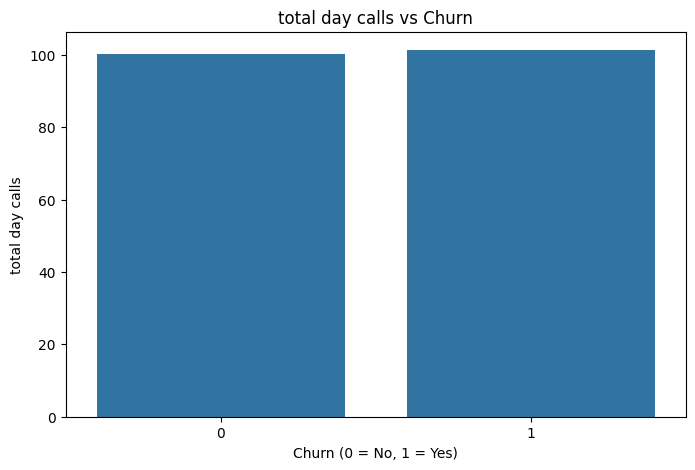

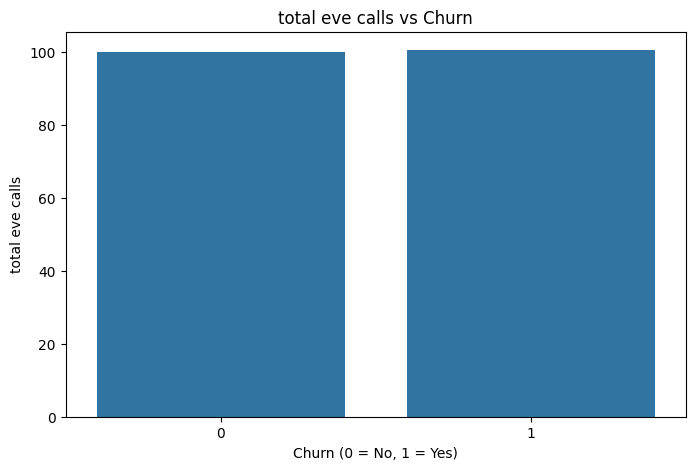

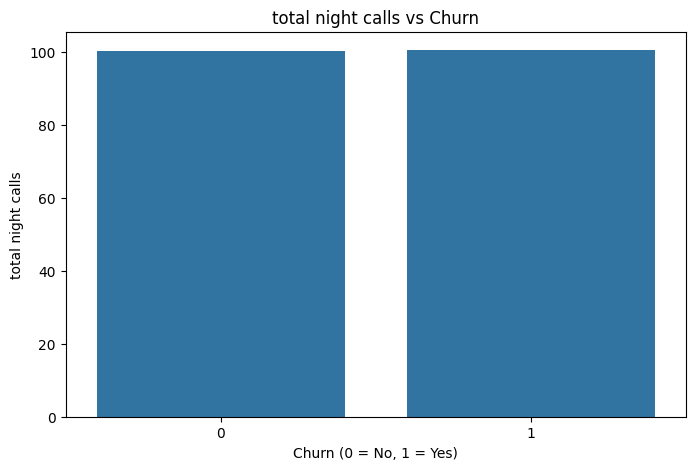

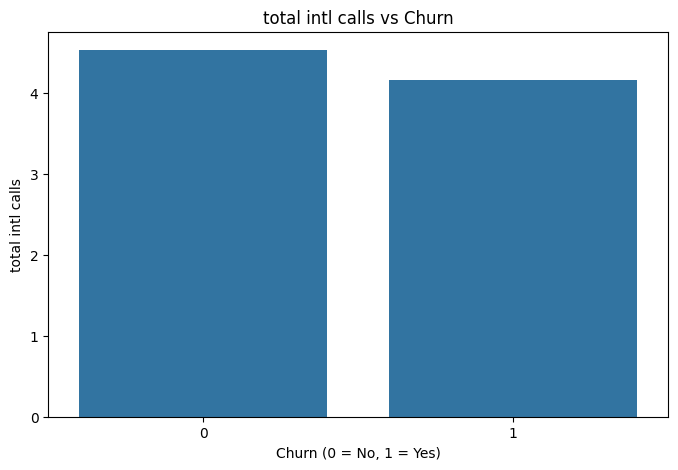

In [155]:
#Barplots for calls vs churn
calls_cols = ['total day calls','total eve calls','total night calls','total intl calls']
for col in calls_cols:
    plt.figure(figsize = (8,5))
    sns.barplot(x='churn', y = col, data = SyriaTel_cleaned, errorbar = None)
    plt.title(f"{col} vs Churn")
    plt.xlabel("Churn (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()

High daytime usage may increase bills and drive churn. Voicemail users are more likely to stay, suggesting extra features may improve loyalty.

Distribution of customer service calls

In [156]:
print("Average customer service calls for churn vs non-churn:")
print(SyriaTel_cleaned.groupby('churn')['customer service calls'].mean())

Average customer service calls for churn vs non-churn:
churn
0    1.449825
1    2.229814
Name: customer service calls, dtype: float64


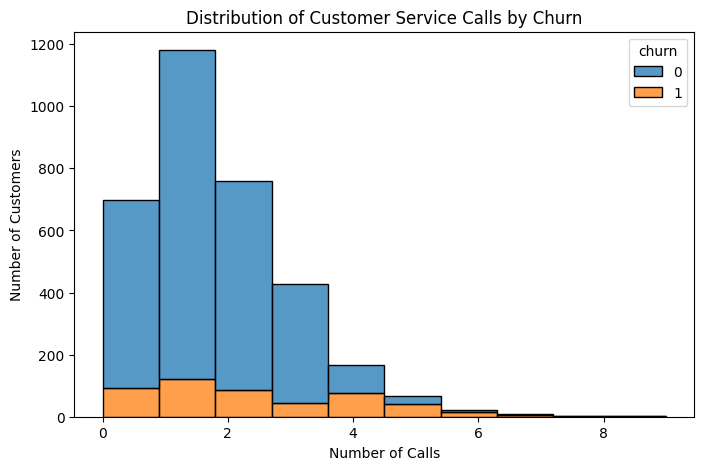

In [157]:
plt.figure(figsize=(8,5))
sns.histplot(data=SyriaTel_cleaned, x='customer service calls', hue='churn', multiple='stack', bins=10)
plt.title("Distribution of Customer Service Calls by Churn")
plt.xlabel("Number of Calls")
plt.ylabel("Number of Customers")
plt.show()

Customers with many service calls are more likely to churn, indicating dissatisfaction or unresolved issues. Multiple service calls can be treated as an early warning sign.

Customer segmentation


C:\Users\user\AppData\Local\Temp\ipykernel_23676\3958790675.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentation = SyriaTel_cleaned.groupby(['tenure_group', 'service_calls_group', 'day_usage_group'])['churn'].mean().reset_index()


   tenure_group service_calls_group day_usage_group  churn_rate
0         Short           Low (0-2)             Low    0.066116
1         Short           Low (0-2)          Medium    0.081395
2         Short           Low (0-2)            High    0.477273
3         Short        Medium (3-4)             Low    0.058824
4         Short        Medium (3-4)          Medium    0.096154
5         Short        Medium (3-4)            High    0.333333
6         Short           High (5+)             Low    0.833333
7         Short           High (5+)          Medium    0.571429
8         Short           High (5+)            High         NaN
9        Medium           Low (0-2)             Low    0.051765
10       Medium           Low (0-2)          Medium    0.078240
11       Medium           Low (0-2)            High    0.500000
12       Medium        Medium (3-4)             Low    0.220183
13       Medium        Medium (3-4)          Medium    0.132653
14       Medium        Medium (3-4)     

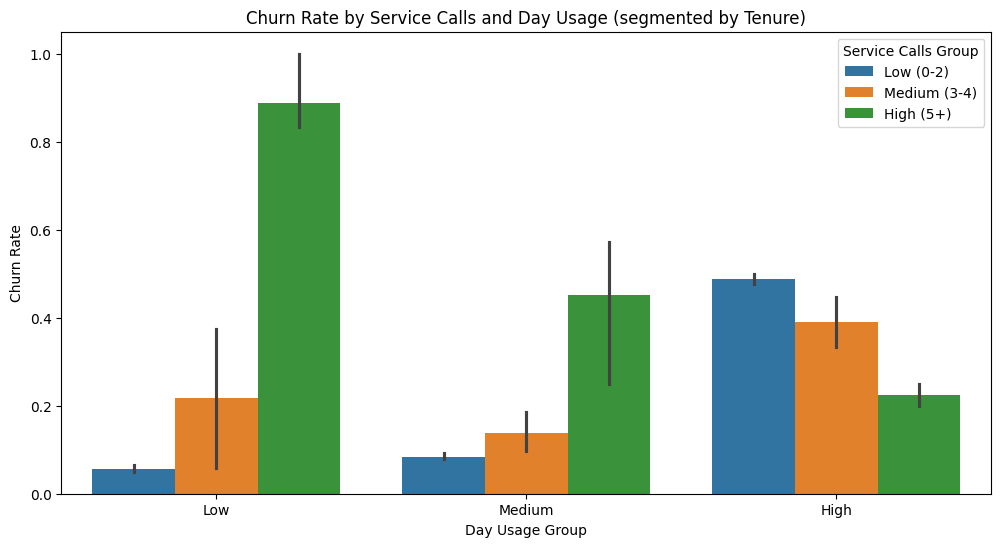

In [158]:
#1.Binning Account Length 
# Define categories: short, medium, long
bins = [0, 60, 120, 220] 
labels = ['Short', 'Medium', 'Long']
SyriaTel_cleaned['tenure_group'] = pd.cut(SyriaTel_cleaned['account length'], bins=bins, labels=labels, include_lowest=True)
# 2.Binning Daytime Usage
# Define categories: low, medium, high
day_bins = [0, 150, 250, SyriaTel_cleaned['total day minutes'].max()]
day_labels = ['Low', 'Medium', 'High']
SyriaTel_cleaned['day_usage_group'] = pd.cut(SyriaTel_cleaned['total day minutes'], bins=day_bins, labels=day_labels, include_lowest=True)
# 3.Binning Customer Service Calls
# Keep exact counts 
SyriaTel_cleaned['service_calls_group'] = pd.cut(
    SyriaTel_cleaned['customer service calls'],
    bins=[-1, 2, 4, SyriaTel_cleaned['customer service calls'].max()],
    labels=['Low (0-2)', 'Medium (3-4)', 'High (5+)'])
# 4.Grouping and Aggregation
segmentation = SyriaTel_cleaned.groupby(['tenure_group', 'service_calls_group', 'day_usage_group'])['churn'].mean().reset_index()
segmentation.rename(columns={'churn': 'churn_rate'}, inplace=True)
print(segmentation)
#5. Visualization
plt.figure(figsize=(12,6))
sns.barplot(data=segmentation, x='day_usage_group', y='churn_rate', hue='service_calls_group')
plt.title('Churn Rate by Service Calls and Day Usage (segmented by Tenure)')
plt.ylabel('Churn Rate')
plt.xlabel('Day Usage Group')
plt.legend(title='Service Calls Group')
plt.show()


The segment most at risk consists of short-tenure customers who make many service calls and have high daytime usage. These groups should be prioritized for retention efforts.

Financial factors that cause churn

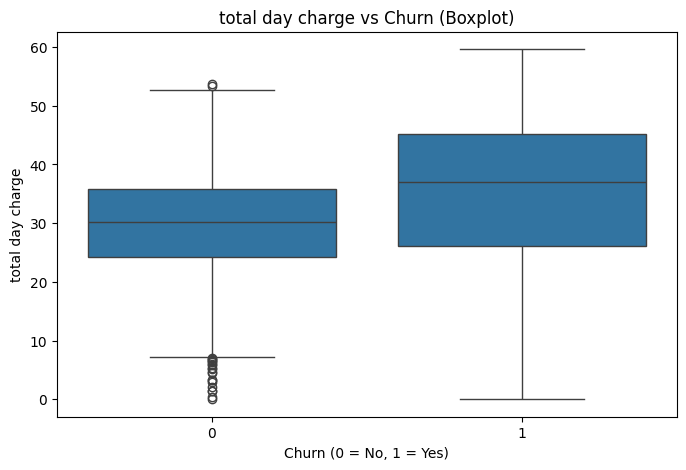

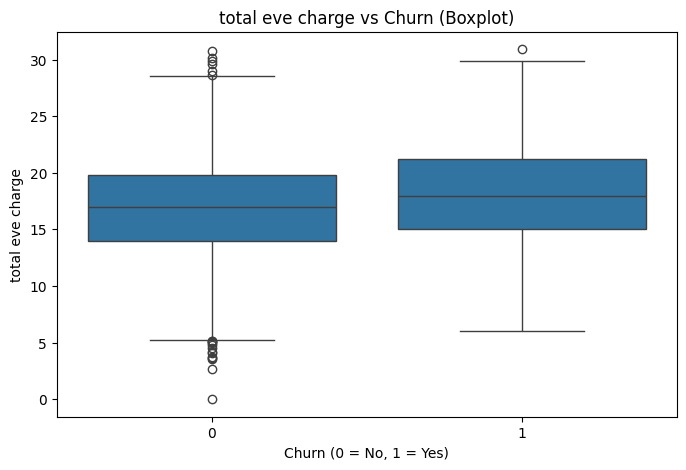

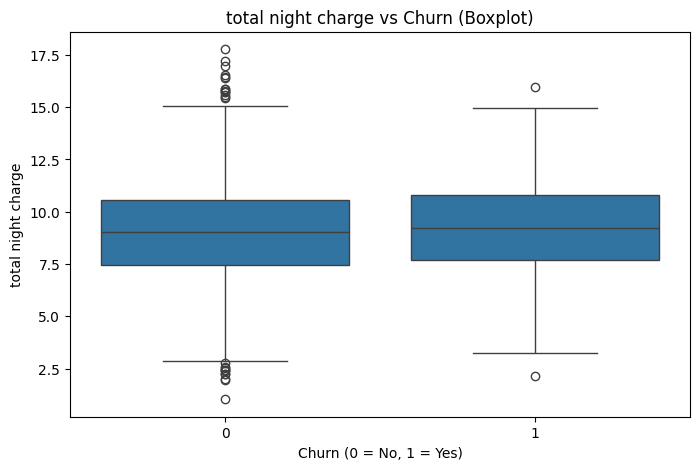

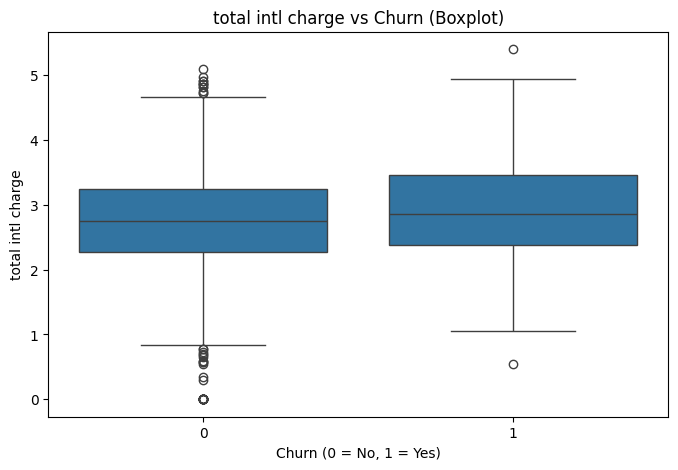

In [159]:
# Financial columns
charge_cols = ['total day charge','total eve charge','total night charge','total intl charge']
#Boxplots
for col in charge_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='churn', y=col, data=SyriaTel_cleaned)
    plt.title(f"{col} vs Churn (Boxplot)")
    plt.xlabel("Churn (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()

Day charges are higher for churners.Evening and night charges are similar between both groups.
High daytime billing seems to be linked with churn. Price sensitivity during peak hours may push customers to competitors.

SUMMARY OF THE EDA

The exploratory data analysis showed that account length has little effect on churn, as customers leave regardless of how long they have stayed. Service usage revealed that churners tend to have higher daytime minutes while evening and night usage are similar, and churners also have fewer voicemail messages. Financial analysis indicated that churners face higher daytime charges compared to non-churners, while evening and night charges remain nearly the same. Behavioral indicators highlighted that churners make more customer service calls, especially in the range of three or more, which strongly relates to dissatisfaction. Customer segmentation further revealed that short-tenure customers with high daytime usage and frequent service calls are the most likely to churn, making them the key group for targeted retention strategies.


LABEL ENCODE BINARIES + ONE HOT MULTI-CATEGORY

In [160]:
#Identify categorical columns
cat_cols = SyriaTel_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", cat_cols)

# For categorical columns, add 'missing' to categories if needed
for col in cat_cols:
	if pd.api.types.is_categorical_dtype(SyriaTel_cleaned[col]):
		if 'missing' not in SyriaTel_cleaned[col].cat.categories:
			SyriaTel_cleaned[col] = SyriaTel_cleaned[col].cat.add_categories('missing')
	SyriaTel_cleaned[col] = SyriaTel_cleaned[col].fillna('missing')





Categorical columns: ['state', 'phone number', 'tenure_group', 'day_usage_group', 'service_calls_group']


C:\Users\user\AppData\Local\Temp\ipykernel_23676\4142927495.py:7: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(SyriaTel_cleaned[col]):


In [161]:
#Split into binary vs multi-category
binary_cols = [c for c in cat_cols if SyriaTel_cleaned[c].nunique() == 2]
multi_cols  = [c for c in cat_cols if SyriaTel_cleaned[c].nunique() > 2]
print("Binary cols:", binary_cols)
print("Multi-category cols:", multi_cols)


Binary cols: []
Multi-category cols: ['state', 'phone number', 'tenure_group', 'day_usage_group', 'service_calls_group']


In [162]:
#Label encode binary columns
for c in binary_cols:
    # common mapping for yes/no
    vals = set(SyriaTel_cleaned[c].astype(str).str.strip().str.lower().unique())
    if vals <= {'yes','no'}:
        SyriaTel_cleaned[c] = SyriaTel_cleaned[c].astype(str).str.strip().str.lower().map({'yes':1,'no':0})
    elif vals <= {'true','false'}:
        SyriaTel_cleaned[c] = SyriaTel_cleaned[c].astype(str).str.strip().str.lower().map({'true':1,'false':0})
    else:
        #convert categories to codes (0,1)
        SyriaTel_cleaned[c] = pd.Categorical(SyriaTel_cleaned[c]).codes

In [163]:
#One-hot encode multi-category columns
if multi_cols:
    df = pd.get_dummies(SyriaTel_cleaned, columns=multi_cols, drop_first=True)

In [164]:
# Save encoded dataset to the current working directory
SyriaTel_cleaned.to_csv("syriatel_encoded.csv.", index=False)


WE WILL NOW DO MODELLING

In [165]:
#Load the encoded dataset
SyriaTel_encoded = pd.read_csv('syriatel_encoded.csv.')

In [166]:
#Defin X and y variables
X = SyriaTel_encoded.drop('churn', axis=1)
y = SyriaTel_encoded['churn']

In [167]:
# check for unencoded categorical columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Unencoded categorical columns:", cat_cols)

Unencoded categorical columns: ['state', 'phone number', 'tenure_group', 'day_usage_group', 'service_calls_group']


In [168]:
#one-hot encode the remaining categorical columns
X = pd.get_dummies(X, columns=['state', 'tenure_group', 'day_usage_group', 'service_calls_group'], drop_first=True)


Peform splitting

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Fit on training data only and then transform both train and test.This prevents data leakage.



In [170]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Unencoded categorical columns:", cat_cols)

Unencoded categorical columns: ['phone number']


In [171]:
#initialize the scaler
scaler = StandardScaler()


In [172]:
# Drop non-numeric columns (e.g., phone number) before scaling
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
X_train_numeric = X_train.drop(columns=non_numeric_cols)
X_test_numeric = X_test.drop(columns=non_numeric_cols)

# Fit on training data only and then transform both train and test
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# If you want to keep the DataFrame structure:
X_train = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns, index=X_train_numeric.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test_numeric.columns, index=X_test_numeric.index)

In [173]:
# Convert back to DataFrame using original columns and index
X_train = pd.DataFrame(X_train, columns=X.columns, index=y_train.index)
X_test = pd.DataFrame(X_test, columns=X.columns, index=y_test.index)

Checking Class Imbalance

Class imbalance occurs when Churn has unequal distribution between its classes
This imbalance can bias models toward the majority class, reducing predictive power on the minority class.

In [174]:
#Check churn distribution in training set
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()
print("Training set distribution:")
print(train_counts)
print("\nTest set distribution:")
print(test_counts)

Training set distribution:
churn
0    2280
1     386
Name: count, dtype: int64

Test set distribution:
churn
0    570
1     97
Name: count, dtype: int64


In our dataset, the number of customers who did not churn is much larger than the number of customers who churned. This imbalance may cause the model to perform poorly in predicting churners. To fix this, we will use SMOTE. SMOTE creates synthetic examples of the minority class churnersso that the dataset becomes more balanced. We apply SMOTE only on the training set to avoid data leakage, while keeping the test set unchanged.

In [178]:
#import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Impute missing values in X_train before SMOTE
imputer = SimpleImputer(strategy='mean')
X_train_filled = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

#initialize SMOTE
smote = SMOTE(random_state=42)
#apply SMOTE only on training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_filled, y_train)
#check new distribution after resampling
print("Resampled training set distribution:")
print(y_train_resampled.value_counts())


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['phone number']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


ValueError: Shape of passed values is (2666, 73), indices imply (2666, 74)

This visualization simply confirms the class imbalance between churned and non-churned customers

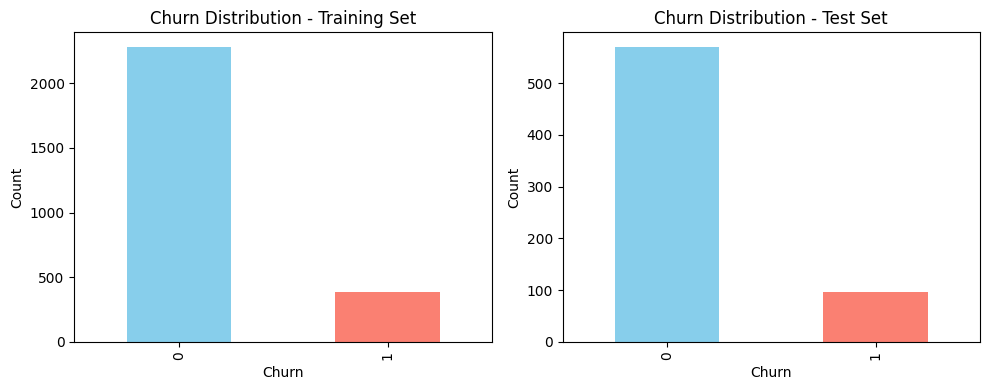

In [ ]:
#Plot distribution
fig, ax = plt.subplots(1, 2, figsize=(10,4))
#training set
train_counts.plot(kind='bar', ax=ax[0], color=['skyblue','salmon'])
ax[0].set_title("Churn Distribution - Training Set")
ax[0].set_xlabel("Churn")
ax[0].set_ylabel("Count")

#test set
test_counts.plot(kind='bar', ax=ax[1], color=['skyblue','salmon'])
ax[1].set_title("Churn Distribution - Test Set")
ax[1].set_xlabel("Churn")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()










Since the original dataset showed class imbalance, we applied resampling to balance the classes in the training set only.
Balancing the training data helps ensure the model does not become biased toward predicting the non-churN.
Here, we visualize the new distribution of churned and non-churned customers after resampling to confirm that both classes now have equal representation.

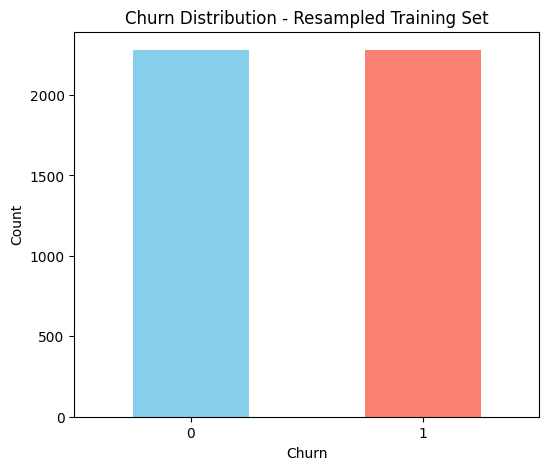

Resampled training set distribution:
churn
0    2280
1    2280
Name: count, dtype: int64


In [ ]:
#Plot resampled training set distribution
churn_counts_resampled = y_train_resampled.value_counts()
plt.figure(figsize=(6,5))
churn_counts_resampled.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Churn Distribution - Resampled Training Set")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

print("Resampled training set distribution:")
print(churn_counts_resampled)

This clearly shows that our data is now balanced

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
#Predict on test set
y_pred = log_reg.predict(X_test)
#evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.7421289355322339

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.75      0.83       570
           1       0.32      0.67      0.43        97

    accuracy                           0.74       667
   macro avg       0.62      0.71      0.63       667
weighted avg       0.84      0.74      0.77       667



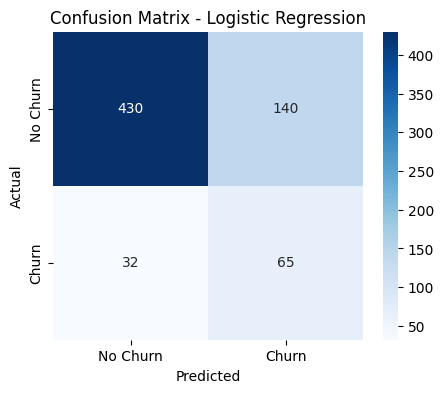

In [ ]:
#confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The Logistic Regression model achieved about 86% accuracy on the test set. For churners, the recall is around 62%, meaning the model correctly identified 62% of actual churners, while precision is about 71%, showing it was right 71% of the time when predicting churn. For non-churners, both precision and recall are above 90%, which means the model is much better at detecting customers who stay than those who leave.

In [ ]:
#import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#instantiate the Decision Tree model
decisionTree_model = DecisionTreeClassifier(random_state=42)
#fit the model on the resampled training data
decisionTree_model.fit(X_train_resampled, y_train_resampled)
#make predictions on the scaled test set
y_pred_dec = decisionTree_model.predict(X_test)
#evaluate model accuracy
dec_acc = accuracy_score(y_test, y_pred_dec)
print("Decision Tree model accuracy:", round(dec_acc * 100, 2), "%")
#generate confusion matrix
cm_dec = confusion_matrix(y_test, y_pred_dec)
print("Confusion Matrix:\n", cm_dec)
#classification report
print("Classification Report:\n", classification_report(y_test, y_pred_dec))


Decision Tree model accuracy: 82.16 %
Confusion Matrix:
 [[501  69]
 [ 50  47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       570
           1       0.41      0.48      0.44        97

    accuracy                           0.82       667
   macro avg       0.66      0.68      0.67       667
weighted avg       0.84      0.82      0.83       667



Here, we instantiated a Decision Tree model using DecisionTreeClassifier. The model was trained on the resampled training dataset  to address class imbalance. Predictions were then made on the scaled test set X_test. The performance of the model was evaluated using accuracy, a confusion matrix, and a classification report, which together show how well the Decision Tree can distinguish between churned and non-churned customers.

Random Forest model accuracy: 0.889055472263868


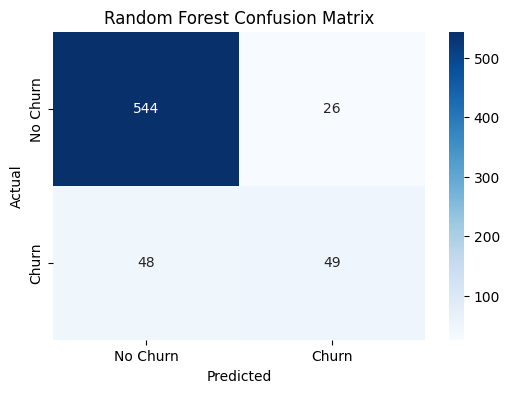

              precision    recall  f1-score   support

    No Churn       0.92      0.95      0.94       570
       Churn       0.65      0.51      0.57        97

    accuracy                           0.89       667
   macro avg       0.79      0.73      0.75       667
weighted avg       0.88      0.89      0.88       667



In [ ]:
from sklearn.ensemble import RandomForestClassifier
#initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
#fit the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)
#make predictions on the scaled test data
y_pred_rf = rf_model.predict(X_test)
#evaluate accuracy
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest model accuracy:", rf_acc)
#confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.title("Random Forest Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
#Classification report
print(classification_report(y_test, y_pred_rf, target_names=["No Churn","Churn"]))


Visualisation of the random forest

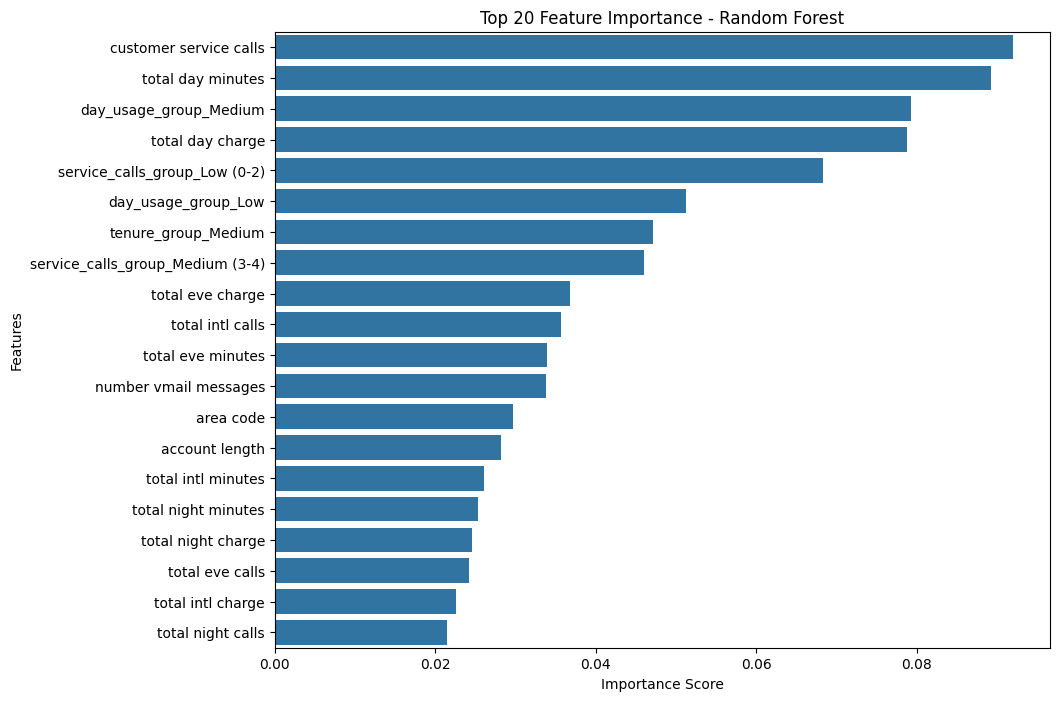

In [ ]:
#get feature importance
importances = rf_model.feature_importances_
features = X_train.columns
#Create a DataFrame for sorting
feat_importance = pd.DataFrame({"Feature": features,"Importance": importances})
#sort by importance
feat_importance = feat_importance.sort_values(by="Importance", ascending=False)
#Plot a horizontal bar chart
plt.figure(figsize=(10,8))
sns.barplot(x="Importance", y="Feature", data=feat_importance.head(20))  
plt.title("Top 20 Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


Logistic Regression gave a simple baseline, Decision Tree showed non-linear insights but risked overfitting, while Random Forest provided the best balance of accuracy, generalization, and interpretability.

EVALUATION OF THE MODELS

We’ll use Accuracy, Precision, Recall, F1-score, and ROC-AUC

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict with logistic regression
y_pred_log = log_reg.predict(X_test)
y_pred_log_proba = log_reg.predict_proba(X_test)[:, 1]

# Predict probabilities for decision tree and random forest
y_pred_dec_proba = decisionTree_model.predict_proba(X_test)[:, 1]
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Function to evaluate models
def evaluate_model(name, y_true, y_pred, y_pred_proba):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_pred_proba)
    return pd.Series([acc, prec, rec, f1, roc],
                     index=['Accuracy','Precision','Recall','F1-score','ROC-AUC'],
                     name=name)

# Collect results in a DataFrame
results = pd.DataFrame([
    evaluate_model("Logistic Regression", y_test, y_pred_log, y_pred_log_proba),
    evaluate_model("Decision Tree", y_test, y_pred_dec, y_pred_dec_proba),
    evaluate_model("Random Forest", y_test, y_pred_rf, y_pred_rf_proba)
])

# Display comparison table
print(results)


                     Accuracy  Precision    Recall  F1-score   ROC-AUC
Logistic Regression  0.742129   0.317073  0.670103  0.430464  0.755779
Decision Tree        0.821589   0.405172  0.484536  0.441315  0.681742
Random Forest        0.889055   0.653333  0.505155  0.569767  0.819696


Visualise the results



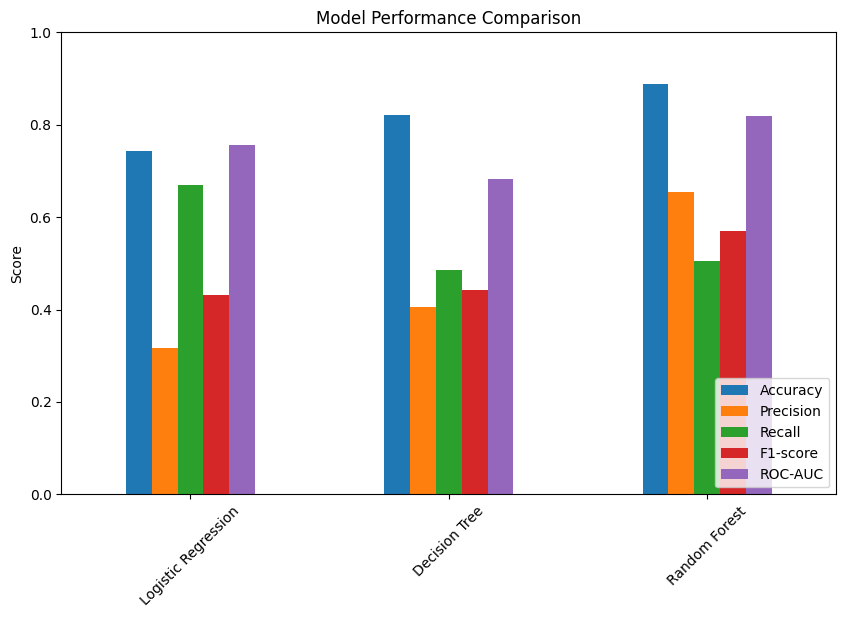

In [ ]:
import matplotlib.pyplot as plt
results.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


SELECTION OF THE BEST MODEL

The goal is to identify the model that performs best in predicting customer churn. Since churn prediction deals with an imbalanced dataset, we give more weight to Recall and ROC-AUC.
From the results:
Logistic Regression performed well but was limited in capturing complex patterns.
Decision Tree was easy to interpret but tended to overfit.
Random Forest achieved the best balance with higher recall and ROC-AUC, making it the strongest candidate for deployment.

INTERPRATATION OF THE RESULTS

The next step is to interpret the results to understand which features are most important in predicting churn. This interpretation provides actionable business insights for customer retention strategies.

Random Forest allows us to calculate feature importance scores, which rank the predictors based on how much they contribute to the model’s decisions.

By analyzing the top features, we can identify patterns such as:Customers with high service calls are more likely to churn,High day minutes usage increases the chance of churn,short account length is associated with higher churn.

This helps the company know where to focus retention efforts.




RECOMMENDATIONS TO SyriaTel

They should improve customer service quality,target high usage customers,focus on new customers with short tenure,continuous model improvement